In [1]:
import folium

In [9]:
latitude, longitude = (37.497159, 126.927651)

In [20]:
m = folium.Map(location=[latitude,longitude],
              zoom_start=17,
              width=750,
              height=500
              )
popup_tag="""<div style='width:65px'>
    <a href="https://playdata.io">
        플레이데이터
    </a>
</div>
""",
folium.Marker([latitude,longitude],
             popup=popup_tag,
             tooltip="플레이데이터").add_to(m)
m

In [21]:
import requests
import json

In [23]:
url = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json"
response = requests.get(url)
data_json = response.json()
data_json.keys()

dict_keys(['type', 'features'])

In [24]:
len(data_json['features'])

180

In [27]:
country_name = [feature['properties']['name'] for feature in data_json['features']]

In [28]:
country_name

['Afghanistan',
 'Angola',
 'Albania',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'Antarctica',
 'French Southern and Antarctic Lands',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'The Bahamas',
 'Bosnia and Herzegovina',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bolivia',
 'Brazil',
 'Brunei',
 'Bhutan',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Switzerland',
 'Chile',
 'China',
 'Ivory Coast',
 'Cameroon',
 'Democratic Republic of the Congo',
 'Republic of the Congo',
 'Colombia',
 'Costa Rica',
 'Cuba',
 'Northern Cyprus',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Denmark',
 'Dominican Republic',
 'Algeria',
 'Ecuador',
 'Egypt',
 'Eritrea',
 'Spain',
 'Estonia',
 'Ethiopia',
 'Finland',
 'Fiji',
 'Falkland Islands',
 'France',
 'Gabon',
 'United Kingdom',
 'Georgia',
 'Ghana',
 'Guinea',
 'Gambia',
 'Guinea Bissau',
 'Equatorial Guinea',
 'Greece',
 'Greenland',
 'Guatemala'

In [29]:
import pandas as pd

In [31]:
survey_raw_df = pd.read_csv("datas/survey_results_public.csv", index_col="ResponseId")
survey_raw_df

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,5,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,5,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,33,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN


In [32]:
schema_raw = pd.read_csv("datas/survey_results_schema.csv", index_col="qname")["question"]
schema_raw["Country"]

'Where do you live? <span style="font-weight: bolder;">*</span>'

In [34]:
country_counts = survey_raw_df.Country.value_counts()
country_counts_df = pd.DataFrame({
    "Country": country_counts.index,
    "Count": country_counts.values
})

In [35]:
country_counts_df

,Country,Count
0,United States of America,13543
1,India,6639
2,Germany,5395
3,United Kingdom of Great Britain and Northern I...,4190
4,Canada,2490
...,...,...
175,Monaco,1
176,Djibouti,1
177,Seychelles,1
178,Solomon Islands,1


In [36]:
set(country_counts_df.Country).symmetric_difference(country_name)

{'Andorra',
 'Antarctica',
 'Antigua and Barbuda',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Bermuda',
 'Brunei',
 'Brunei Darussalam',
 'Burundi',
 'Cape Verde',
 'Central African Republic',
 'Congo, Republic of the...',
 "Côte d'Ivoire",
 'East Timor',
 'Equatorial Guinea',
 'Eritrea',
 'Falkland Islands',
 'French Guiana',
 'French Southern and Antarctic Lands',
 'Greenland',
 'Guinea Bissau',
 'Hong Kong (S.A.R.)',
 'Iran',
 'Iran, Islamic Republic of...',
 'Isle of Man',
 'Ivory Coast',
 "Lao People's Democratic Republic",
 'Laos',
 'Libya',
 'Libyan Arab Jamahiriya',
 'Macedonia',
 'Maldives',
 'Mauritius',
 'Moldova',
 'Monaco',
 'New Caledonia',
 'Nomadic',
 'Northern Cyprus',
 'Palau',
 'Palestine',
 'Puerto Rico',
 'Republic of Korea',
 'Republic of Moldova',
 'Republic of Serbia',
 'Republic of the Congo',
 'Russia',
 'Russian Federation',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'San Marino',
 'Serbia',
 'Seychelles',
 'Singapore',
 'Somaliland',
 'South Sudan',
 'Syria',
 '

In [38]:
rename_data = {
    'Republic of Korea': 'South Korea',
    'United Kingdom of Great Britain and Northern Island': 'United Kingdom',
    'Viet Nam': 'Vietnam',
    'Russian Federation': 'Russia'
}

In [42]:
rename_data.keys()

dict_keys(['Republic of Korea', 'United Kingdom of Great Britain and Northern Island', 'Viet Nam', 'Russian Federation'])

In [46]:
country_counts_df.replace(rename_data, inplace=True)

In [47]:
sorted(country_counts_df.Country.values)

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo, Republic of the...',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong (S.A.R.)',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran, Islamic Republic of...',
 'Iraq

In [48]:
country_counts_df.loc[country_counts_df.Country==rename_data.values()]

,Country,Count


In [49]:
m = folium.Map(location=(30,0), zoom_start=2)
url

'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'

In [53]:
folium.Choropleth(
    geo_data=url,
    data=country_counts_df,
    columns=["Country", "Count"],
    key_on="feature.properties.name",
    threshold_scale=[1, 30, 100, 300, 1000,3000, 10000,14000],
    fill_color="YlGn",
    fill_opacity=.7,
    line_opacity=.2,
    legend_name="Respondents"
).add_to(m)


folium.LayerControl().add_to(m)

m



In [54]:
m.save("datas/country.html")

In [55]:
m = folium.Map(location=[30,0], zoom_start=2)
folium.Choropleth(
    geo_data=url,
    data=country_counts_df,
    columns=['Country', 'Count'],
    key_on='feature.properties.name',
    threshold_scale=[1,30,100,300,1_000,3_000,10_000,14_000],
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Respondents',
).add_to(m)
folium.LayerControl().add_to(m)
m

In [57]:
folium.Choropleth(
    geo_data=url,
    data=country_counts_df,
    columns=["Country", "Count"],
    key_on="feature.properties.name",
    threshold_scale=[1, 30, 100, 300, 1000,3000, 10000,14000],
    fill_color="YlGn",
    fill_opacity=.7,
    line_opacity=.2,
    legend_name="Respondents"
).add_to(m)


folium.LayerControl().add_to(m)

m



In [58]:
m.save("datas/country.html")

In [59]:
country = survey_raw_df.Country.copy()

In [62]:
country.replace(rename_data, inplace=True)

In [61]:
survey_raw_df.Country.unique()

array([nan, 'Canada',
       'United Kingdom of Great Britain and Northern Ireland', 'Israel',
       'United States of America', 'Germany', 'India', 'Netherlands',
       'Croatia', 'Australia', 'Russian Federation', 'Czech Republic',
       'Austria', 'Serbia', 'Italy', 'Ireland', 'Poland', 'Slovenia',
       'Iraq', 'Sweden', 'Madagascar', 'Norway', 'Taiwan',
       'Hong Kong (S.A.R.)', 'Mexico', 'France', 'Brazil', 'Lithuania',
       'Uruguay', 'Denmark', 'Spain', 'Egypt', 'Turkey', 'South Africa',
       'Ukraine', 'Finland', 'Romania', 'Portugal', 'Singapore', 'Oman',
       'Belgium', 'Chile', 'Bulgaria', 'Latvia', 'Philippines', 'Greece',
       'Belarus', 'Saudi Arabia', 'Kenya', 'Switzerland', 'Iceland',
       'Viet Nam', 'Thailand', 'China', 'Montenegro', 'Slovakia', 'Japan',
       'Luxembourg', 'Turkmenistan', 'Argentina', 'Hungary', 'Tunisia',
       'Bangladesh', 'Maldives', 'Dominican Republic', 'Jordan',
       'Pakistan', 'Nepal', 'Iran, Islamic Republic of...', 'I

In [64]:
country = survey_raw_df["Country"].copy()
country

ResponseId
1                                                      NaN
2                                                   Canada
3        United Kingdom of Great Britain and Northern I...
4                                                   Israel
5                                 United States of America
                               ...                        
73264                                              Nigeria
73265                             United States of America
73266                             United States of America
73267    United Kingdom of Great Britain and Northern I...
73268                                               Canada
Name: Country, Length: 73268, dtype: object

In [65]:
country.replace(rename_data, inplace=True)
country_counts = country.value_counts()
country_counts_df = pd.DataFrame({
    "Country":country_counts.index,
    "Count":country_counts.values
})

In [68]:
seoul_geojson = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"

m = folium.Map(
    location=[37.57, 126.99],
    zoom_start=11,
)

folium.Choropleth(
    geo_data=seoul_geojson,
    fill_color = "#22AA44",
    fill_opacity=.4,
    line_opacity=1,
).add_to(m)
m

In [69]:
from wordcloud import WordCloud

In [70]:
%pwd

'C:\\python'

In [71]:
survey_raw_df = pd.read_csv("datas/survey_results_public.csv", index_col="ResponseId")
survey_raw_df

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,5,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,5,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,33,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN


In [73]:
dev_type = survey_raw_df.DevType.copy()

In [74]:
dev_type.dropna(inplace=True)

In [75]:
dev_type = dev_type.str.replace(";", " ").str.replace(",", " ")

In [76]:
dev_type

ResponseId
3        Data scientist or machine learning specialist ...
4                                    Developer  full-stack
5        Developer  front-end Developer  full-stack Dev...
8                            Developer  full-stack Student
9                                      Developer  back-end
                               ...                        
73264                                  Developer  back-end
73265        Data scientist or machine learning specialist
73266    Developer  full-stack Developer  desktop or en...
73267    Developer  front-end Developer  desktop or ent...
73268    Developer  front-end Engineer  data Engineer  ...
Name: DevType, Length: 61302, dtype: object

In [77]:
words = ' '.join(dev_type)

In [ ]:
words

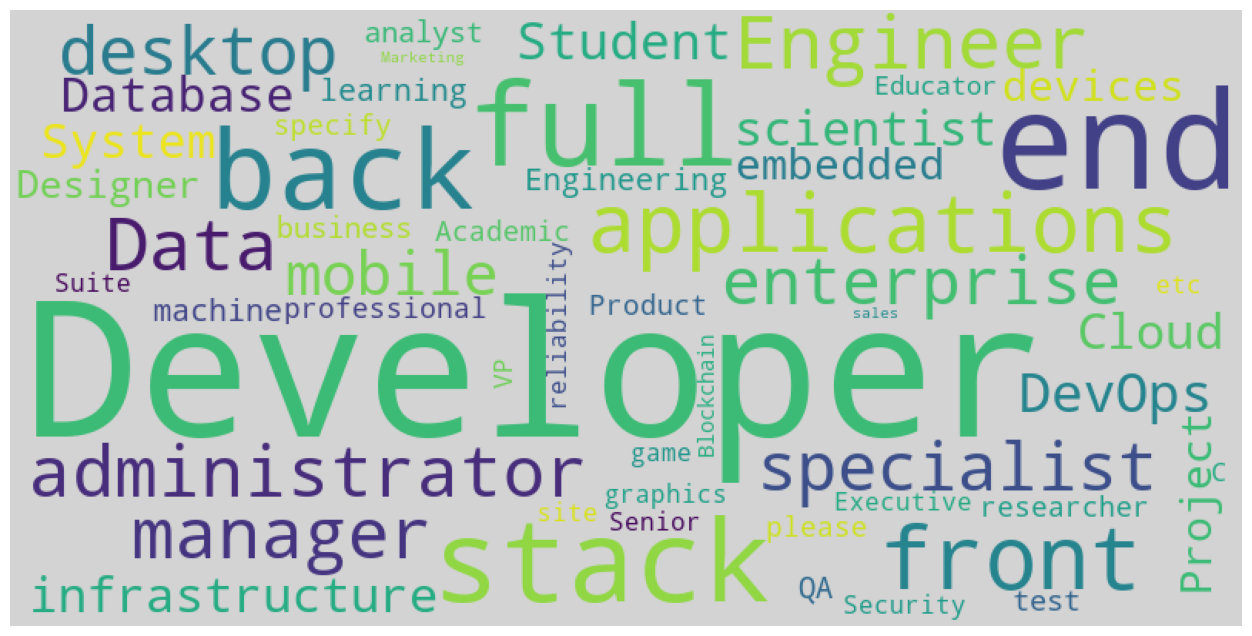

In [81]:
import matplotlib.pyplot  as plt
wc = WordCloud(collocation_threshold=int(1e6),
               width=800, height=400,
               background_color="lightgrey").generate(words)
plt.figure(figsize=(16, 8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc)
plt.show()